In [1]:
%matplotlib widget
import healpy as hp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import isrf.circle as circle
import isrf.plot_utils as plot_utils
import isrf.ray as ray
import isrf.testing_utils as testing_utils
import isrf.utils as utils


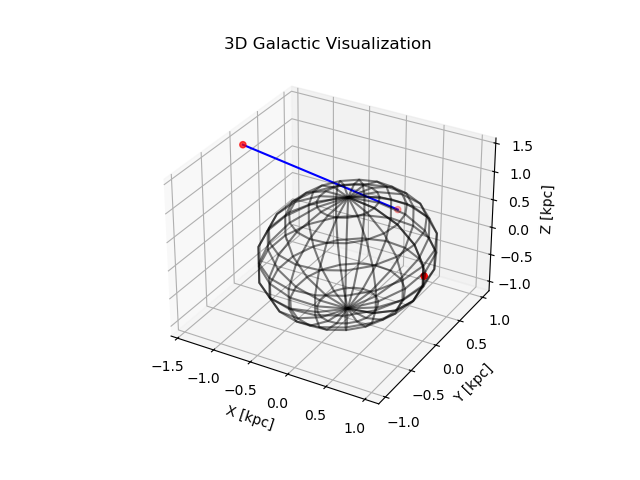

In [2]:

# Example galactic coordinates (longitude, latitude, radius)
coordinates = [
    (0, 0, 1),   # Center of the galaxy
    (90, 0, 1),  # 90 degrees longitude
    (180, 45, 2) # Some point in space
]

# Convert to Cartesian coordinates for plotting
points = np.array([utils.galactic_to_cartesian(*coord) for coord in coordinates])

# Plot points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], color='r')

# Draw lines between points
plot_utils.add_ray(ax, points[2], points[1])

# Add spherical shell at radius 1
plot_utils.add_spherical_shell(ax)
# Add labels
plot_utils.add_xyz_labels(ax)
ax.set_title('3D Galactic Visualization')

plt.show()


## Function for the arches implementation

In [3]:


# plot_utils.plot_test_circle()
# plot_utils.plot_test_arch()



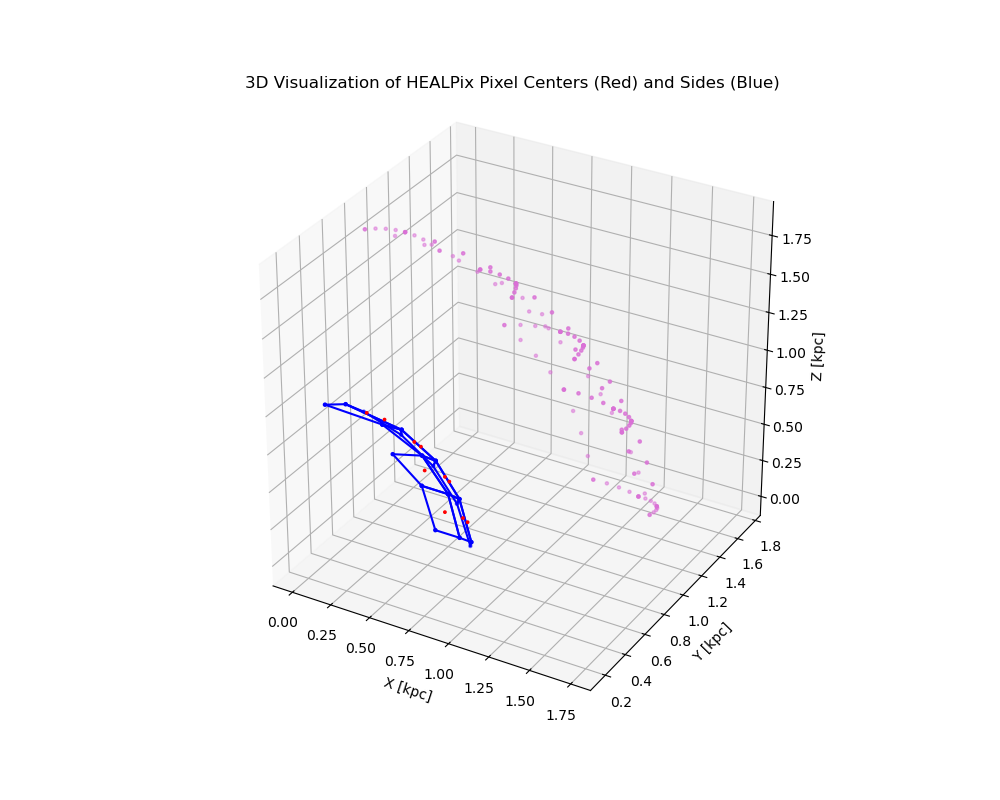

In [4]:


# Set the HEALPix resolution
nside = 4  # A manageable nside value for clear visualization
nest = True  # Use NESTED pixel ordering
# Prepare a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

pixel_index_array = np.arange(hp.nside2npix(nside))[0:10]

#add_fullsky_healpix_centers(ax, nside)
#plot_utils.add_healpixels(ax, pixel_index_array, nside, nest=nest)

# # Set the aspect of the plot to be equal
ax.set_box_aspect([1,1,1])

# Add spherical shell at radius 1
#plot_utils.add_spherical_shell(ax)

#
plot_utils.add_healpix_boundaries(ax, pixel_index_array, nside, nest=nest)

plot_utils.add_healpix_centers(ax, pixel_index_array, nside, nest=nest)


plot_utils.add_healpix_arches(ax, pixel_index_array, nside, nest=nest, npoints=5, radius = 2)
# Add labels
plot_utils.add_xyz_labels(ax)
# Add a title
ax.set_title('3D Visualization of HEALPix Pixel Centers (Red) and Sides (Blue)')
ax.grid(True)

plt.show()



## Functions for ray tracing

In [4]:

example_points = plot_utils.get_example_points()

In [5]:
star, isrf, bla = example_points

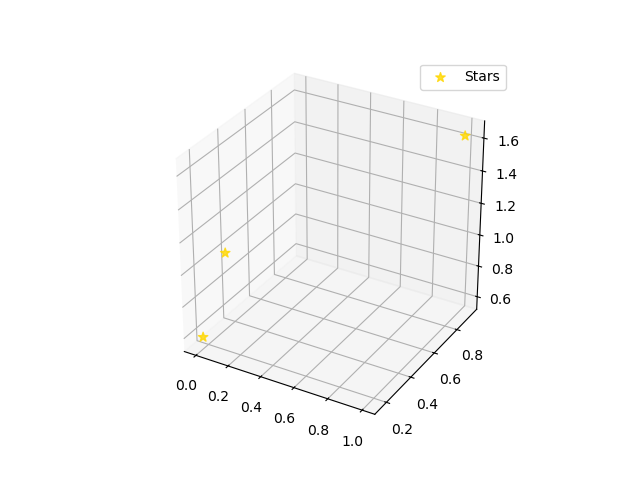

In [ ]:


class StarField:
    def __init__(self, positions):
        """
        Initialize a field of stars.

        Parameters:
        - positions: array-like, shape (3,) or (n_stars, 3), galactic coordinates of the star(s), 
          where each star is represented by (l, b, r).
        """
        self.stars_galactic = np.asanyarray(positions)
        self.stars_cartesian = utils.galactic_to_cartesian(self.stars_galactic[:, 0], self.stars_galactic[:, 1], self.stars_galactic[:, 2])

    def plot_stars(self):

        fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
        ax.set_box_aspect([1, 1, 1])
        plot_utils.add_stars(ax, self.stars_cartesian)
        ax.legend()
        plt.show()
        return ax


    def get_ISRF_locations(self, isrf):
        """
        Get the locations where to calculate the ISRF.
        This method converts the galactic coordinates of the ISRF to Cartesian coordinates.

        Parameters:
        - isrf: numpy array, ISRF object containing the positions of ISRF, 
          where each position is represented by (l, b, r).
        """
        isrf = np.asanyarray(isrf)
        isrf_cartesian = utils.galactic_to_cartesian(isrf[:, 0], isrf[:, 1], isrf[:, 2])
        self.isrf_positions = isrf_cartesian
        
    
    def plot_isrf(self, ax, alpha=0.5):
        """
        Plot the ISRF locations in the star field.
        This method assumes that the ISRF positions have been set using `get_ISRF_locations`.
        """
        if not hasattr(self, 'isrf_positions'):
            raise ValueError("ISRF positions have not been set. Call get_ISRF_locations first.")
        plot_utils.add_scatter_points_array(ax, self.isrf_positions, label='ISRF', color='green', s=10, alpha=alpha )
        return ax

def get_example_ISRF():
    """
    Get example ISRF positions in galactic coordinates.
    Returns:
    - numpy array of shape (n_isrf, 3) with (l, b, r) coordinates.
    """
    # Example ISRF positions in galactic coordinates (l, b, r)
    return np.array([
        [30, 10, 0.5],  # ISRF at some point in the galaxy
        [-20, -20, 2]  # Another ISRF position    
        ])


star_positions =  plot_utils.get_example_stars()
isrf_positions = get_example_ISRF()
star_field = StarField(star_positions)
ax = star_field.plot_stars()
star_field.get_ISRF_locations(isrf_positions)
star_field.plot_isrf(ax)

plot_utils.add_healpixels(ax, nside=2,alpha=0.05, centers = True, s=1, radius=2, color='blue')